<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/Sesgo%2C_Varianza_y_entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, HTML

# BLOQUE: El texto que enviaste, todo integrado como sección desplegable
sesgo_varianza_contenido = r"""
<h4>Objetivo Fundamental del Aprendizaje Supervisado</h4>
<p>
En el núcleo del aprendizaje supervisado, ya sea en contextos de regresión o clasificación, yace un objetivo estadístico esencial: la estimación de una función desconocida que mapea características observables hacia un resultado. Se asume que existe una función verdadera, aunque inobservable, que representa la relación sistemática entre un conjunto de variables independientes \( X \in \mathbb{R}^p \) y una variable dependiente \( y \in \mathbb{R} \) o una categoría discreta. Formalmente, dicha relación puede expresarse como:
</p>
<div class="formula-block">$$ y = f(X) + \varepsilon $$</div>
<p>
donde \( f(X) \) es la función objetivo desconocida que queremos aproximar, y \( \varepsilon \sim \mathcal{N}(0, \sigma^2_\varepsilon) \) es un término de error aleatorio con esperanza cero e independiente de \( X \). Este componente encapsula tanto el error de medición como la variabilidad atribuible a factores no observados o incontrolables, estableciendo así un límite teórico al poder predictivo de cualquier modelo. Desde un punto de vista estadístico, este es el “error irreducible”, y se asume que es ineliminable mediante técnicas de modelado.
</p>
<p>
El objetivo del aprendizaje supervisado, por tanto, se traduce en construir un estimador \( \hat{f}(X) \) que actúe como una función de predicción basada en una muestra finita de datos. Esta función estimada debería acercarse lo más posible a la función \( f(X) \), de modo que minimice el error de predicción esperado sobre nuevos datos no observados.
</p>

<h4>La Descomposición Matemática del Error</h4>
<p>
La bondad de una estimación \( \hat{f}(x) \) se evalúa mediante alguna métrica de pérdida. En el contexto estadístico clásico, la más común es el error cuadrático medio (MSE), definido como:
</p>
<div class="formula-block">$$ \mathrm{MSE}(x) = \mathbb{E}[(y - \hat{f}(x))^2] $$</div>
<p>
donde la esperanza se toma sobre la distribución de posibles conjuntos de entrenamiento. Es decir, estamos midiendo el rendimiento promedio de nuestro modelo sobre diferentes muestras posibles de la población subyacente. Este enfoque conecta directamente con el concepto de riesgo esperado en teoría de la estimación.
</p>
<p>
La teoría del aprendizaje estadístico demuestra que este error se puede descomponer en tres componentes fundamentales:
</p>
<div class="formula-block">
$$
\mathbb{E}[(y - \hat{f}(x))^2] =
\bigl(\mathbb{E}[\hat{f}(x)] - f(x)\bigr)^2 +
\mathbb{E}\bigl[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2\bigr] +
\sigma^2_\varepsilon
$$
</div>
<p>
Esta expresión, conocida como la descomposición de sesgo-varianza, segmenta el error total en:
</p>
<ul>
<li><strong>Error irreducible \( \sigma^2_\varepsilon \):</strong> Representa la varianza del término de ruido y establece un piso ineludible para el error del modelo.</li>
<li><strong>Sesgo al cuadrado \( (\mathbb{E}[\hat{f}(x)] - f(x))^2 \):</strong> Refleja el error sistemático introducido al suponer una forma funcional específica que puede no coincidir con la función real. Un sesgo alto indica que el modelo promedio tiende a desviarse consistentemente de la verdad.</li>
<li><strong>Varianza \( \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2] \):</strong> Mide la sensibilidad del modelo frente a los datos de entrenamiento. Si pequeñas variaciones en el conjunto de datos provocan grandes cambios en el modelo aprendido, se dice que el modelo tiene alta varianza.</li>
</ul>
<p>
Desde la teoría de estimación, esta descomposición refleja un dilema clásico: cualquier intento por reducir uno de los dos errores reducibles (sesgo o varianza) tiende a incrementar el otro, lo que da lugar a un compromiso fundamental que se debe gestionar con cuidado.
</p>

<h4>Perfil de los Modelos de Alto Sesgo (Subajuste o Underfitting)</h4>
<p>
Los modelos con alto sesgo imponen restricciones estructurales fuertes sobre la forma funcional de \( f(x) \). Estas restricciones limitan la capacidad del modelo para ajustarse a la estructura real de los datos, resultando en un error sistemático incluso en los datos de entrenamiento.
</p>
<p>
Modelos como la regresión lineal asumen que la relación entre variables es lineal y aditiva. Si la función real contiene interacciones no lineales o estructuras complejas, la mejor aproximación lineal seguirá estando lejos de la verdad. En términos probabilísticos, esto implica que la expectativa del estimador está sistemáticamente alejada del valor verdadero.
</p>
<p>
El diagnóstico más común de un modelo con alto sesgo es que produce errores significativos tanto en entrenamiento como en validación, indicando que no ha captado suficientemente la señal presente en los datos.
</p>
<p>
La solución pasa por aumentar la complejidad del modelo. Esto puede lograrse mediante transformaciones no lineales de las variables, introducción de interacciones, o mediante modelos más flexibles como árboles de decisión o redes neuronales. Otra estrategia consiste en disminuir la penalización regularizadora en modelos que usan Lasso o Ridge, permitiendo que los parámetros se ajusten más libremente a los datos.
</p>

<h4>Perfil de los Modelos de Alta Varianza (Sobreajuste u Overfitting)</h4>
<p>
Los modelos con alta varianza tienen una capacidad expresiva elevada, lo que les permite adaptarse casi perfectamente a las particularidades del conjunto de entrenamiento. Sin embargo, esta flexibilidad puede convertirse en una debilidad si el modelo termina capturando ruido en lugar de señal. Esto ocurre cuando \( \hat{f}(x) \) tiene una dispersión alta respecto a su media a lo largo de distintas muestras de entrenamiento.
</p>
<p>
Ejemplos canónicos son árboles de decisión no podados, que crean reglas específicas para subconjuntos muy pequeños de datos, y k-NN con k=1, que simplemente replica la etiqueta del vecino más cercano sin ningún tipo de suavización. Ambos casos producen modelos extremadamente sensibles a la composición específica del conjunto de entrenamiento.
</p>
<p>
El síntoma típico del sobreajuste es un error de entrenamiento muy bajo, pero un error de validación significativamente más alto. Es decir, el modelo no generaliza. Para mitigar la varianza se pueden emplear técnicas de regularización, que penalizan soluciones excesivamente complejas, así como técnicas de ensamble como bagging y Random Forest, que promedian múltiples modelos para estabilizar sus predicciones. Una solución poderosa pero costosa es aumentar el tamaño del conjunto de entrenamiento, diluyendo así el impacto del ruido específico de cada muestra.
</p>

<h4>El Compromiso Sesgo-Varianza y el Punto Óptimo</h4>
<p>
La relación entre sesgo y varianza constituye uno de los dilemas centrales del aprendizaje estadístico. Un modelo demasiado simple no podrá aproximar la función verdadera (sesgo alto), mientras que uno excesivamente complejo ajustará incluso las fluctuaciones aleatorias del conjunto de entrenamiento (varianza alta). Esto genera una curva en forma de U al graficar el error total en función de la complejidad del modelo.
</p>
<p>
El objetivo es identificar el punto de inflexión en el que la disminución adicional del sesgo ya no compensa el crecimiento de la varianza. Ese punto representa el nivel de complejidad que minimiza el error de generalización, y se puede estimar empíricamente mediante técnicas de validación cruzada.
</p>
<p>
Las curvas de aprendizaje permiten identificar si el problema principal es el sesgo (cuando tanto el error de entrenamiento como el de validación son altos) o la varianza (cuando hay una gran brecha entre ambos). Las curvas de validación, por otro lado, trazan el rendimiento frente a un hiperparámetro y permiten seleccionar el valor que optimiza el error en el conjunto de validación.
</p>
<p>
En definitiva, la gestión del compromiso entre sesgo y varianza es el eje central en el diseño de modelos predictivos efectivos. Todas las decisiones técnicas —desde la arquitectura del modelo hasta la selección de variables y el ajuste de hiperparámetros— están subordinadas a este principio rector. Un buen modelador es aquel que sabe reconocer cuándo un modelo simple es suficiente y cuándo la complejidad está justificada por la estructura latente de los datos. Así, el equilibrio estadístico se convierte en el arte esencial de todo científico de datos.
</p>
"""

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS
# =========================================================

introduction_entropy_html = r"""
<div class="content-block">
    <h2>Sesgo, Varianza y Error en Aprendizaje Supervisado</h2>
    <p>En esta lección encontrarás el desarrollo detallado y formal del objetivo central del aprendizaje supervisado, la descomposición del error en sus tres componentes (sesgo, varianza y error irreducible), y el análisis de las implicancias para el diseño de modelos predictivos.</p>
</div>
"""

conclusion_entropy_html = r"""
<div class="content-block">
    <h2>Conclusión</h2>
    <p>El equilibrio entre sesgo y varianza no es un detalle técnico menor, sino el desafío central que atraviesa todo el modelado predictivo moderno. Comprender, diagnosticar y gestionar este compromiso es lo que distingue a un científico de datos de excelencia.</p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES
# =========================================================
entropy_cards_data = [
    {
        "titulo": r"Sesgo, Varianza y Descomposición del Error: Desarrollo Completo",
        "contenido": sesgo_varianza_contenido
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(entropy_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL PROFESIONAL
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\(', '\\)']],
        displayMath: [['$$', '$$'], ['\\[', '\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #311b92 0%, #4527a0 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(245, 243, 255, 0.95);
      --text-primary: #1a237e;
      --text-secondary: #311b92;
      --text-light: #ffffff;
      --accent-primary: #512da8;
      --accent-secondary: #7e57c2;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(209, 196, 233, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f0c29 0%, #302b63 100%);
      --bg-secondary: rgba(26, 22, 53, 0.85);
      --bg-tertiary: rgba(38, 33, 78, 0.8);
      --text-primary: #ede7f6;
      --text-secondary: #d1c4e9;
      --accent-primary: #9575cd;
      --accent-secondary: #b39ddb;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.4);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.4; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.8s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.8s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content ul li::marker {{ color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .formula-block {{ padding: 1.5rem; background: rgba(0, 0, 0, 0.1); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; color: var(--text-primary); border: 1px solid var(--border-color); }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    .MathJax {{ color: var(--text-primary) !important; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        const storedTheme = localStorage.getItem('theme');
        setTheme(storedTheme || 'dark');

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax && card.classList.contains('open')) {{
                    window.MathJax.typesetPromise([card]).catch(err => console.log('MathJax typeset error:', err));
                }}
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                p.style.opacity = 0.6;
                container.appendChild(p);
            }}
        }}

        window.addEventListener('load', () => {{
            if (window.MathJax) {{
                window.MathJax.typesetPromise().catch(err => console.log('Initial MathJax error:', err));
            }}
        }});
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Sesgo, Varianza y Descomposición del Error",
    introduction_html=introduction_entropy_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_entropy_html,
    footer_text="Material elaborado por el equipo de ciencia de datos"
)

display(HTML(final_html))


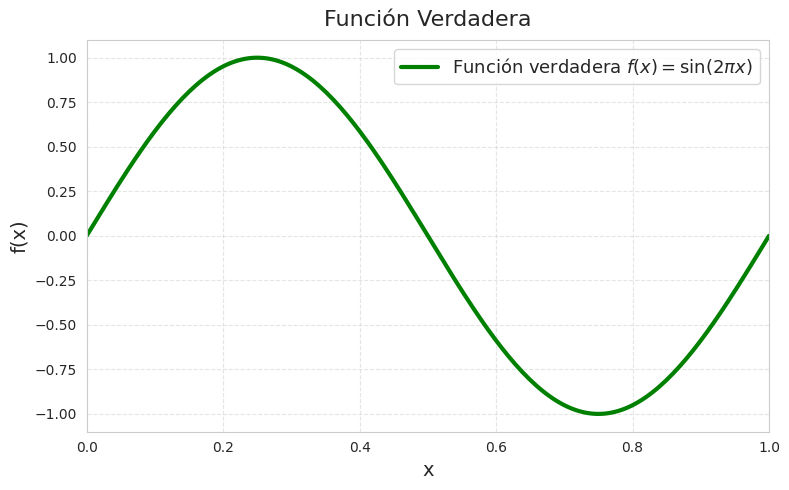

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función verdadera
def true_func(x):
    return np.sin(2 * np.pi * x)

# Rango de x y evaluación de la función
x_plot = np.linspace(0, 1, 200)
y_true = true_func(x_plot)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_true, color='green', lw=3, label='Función verdadera $f(x) = \sin(2\pi x)$')

# Personalización
plt.title('Función Verdadera', fontsize=16, pad=10)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend(fontsize=13, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(-1.1, 1.1)

# Mostrar
plt.tight_layout()
plt.show()


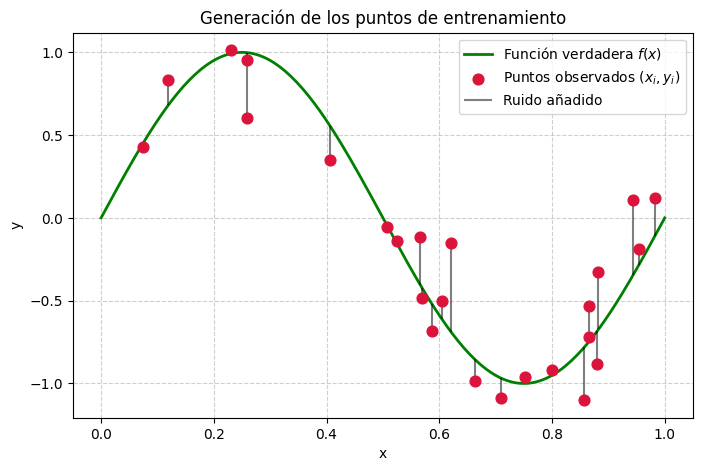

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N_SAMPLES = 25
NOISE_STD = 0.25

# Función verdadera
def true_func(x):
    return np.sin(2 * np.pi * x)

# 1. Genera los puntos x de entrenamiento (aleatorios, en [0,1])
x_train = np.sort(np.random.rand(N_SAMPLES))
# 2. Calcula la función verdadera en esos puntos
y_true = true_func(x_train)
# 3. Genera el error (ruido) para cada punto
errores = np.random.normal(0, NOISE_STD, N_SAMPLES)
# 4. Calcula los valores observados (lo que "vería" el modelo)
y_observed = y_true + errores

# 5. Visualiza
x_plot = np.linspace(0, 1, 200)
plt.figure(figsize=(8,5))
plt.plot(x_plot, true_func(x_plot), color='green', lw=2, label='Función verdadera $f(x)$')
plt.scatter(x_train, y_observed, color='crimson', s=60, zorder=10, label='Puntos observados $(x_i, y_i)$')
plt.vlines(x_train, y_true, y_observed, color='black', alpha=0.5, lw=1.5, label='Ruido añadido')
plt.title('Generación de los puntos de entrenamiento')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


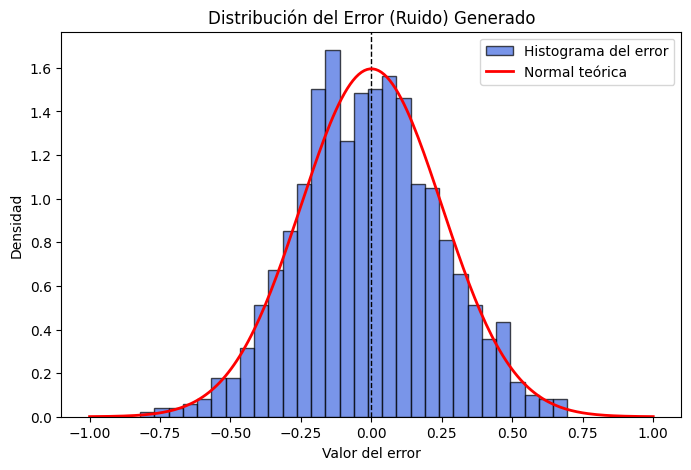

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NOISE_STD = 0.25
N = 1000  # Genera más muestras para ver bien la distribución

# Genera errores aleatorios (ruido)
errores = np.random.normal(0, NOISE_STD, N)

# Gráfico del histograma
plt.figure(figsize=(8, 5))
plt.hist(errores, bins=30, density=True, color='royalblue', alpha=0.7, edgecolor='black', label='Histograma del error')
plt.title('Distribución del Error (Ruido) Generado')
plt.xlabel('Valor del error')
plt.ylabel('Densidad')
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.legend()

# Dibuja la curva teórica normal para comparar
from scipy.stats import norm
x_vals = np.linspace(-1, 1, 200)
plt.plot(x_vals, norm.pdf(x_vals, 0, NOISE_STD), 'r-', lw=2, label='Normal teórica')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets

# 1. Definir función verdadera
def true_func(x):
    return np.sin(2 * np.pi * x)

# 2. Generar muestra de entrenamiento con ruido
np.random.seed(42)
N_SAMPLES = 25
NOISE_STD = 0.25
x_train = np.sort(np.random.rand(N_SAMPLES))
y_train = true_func(x_train) + np.random.normal(0, NOISE_STD, N_SAMPLES)

# 3. Dominio para graficar curvas suaves
x_plot = np.linspace(0, 1, 200)
y_true = true_func(x_plot)

# 4. Función de graficación
def plot_approximation(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x_train[:, None])
    model = LinearRegression().fit(X_poly, y_train)
    y_pred = model.predict(poly.transform(x_plot[:, None]))

    plt.figure(figsize=(8,5))
    plt.plot(x_plot, y_true, color='green', lw=3, label='Función verdadera $f(x)$')
    plt.scatter(x_train, y_train, color='crimson', s=60, zorder=10, label='Datos de entrenamiento')
    plt.plot(x_plot, y_pred, color='navy', lw=2, label=f'Aproximación polinomial (grado {degree})')
    plt.title(f'Aproximación de la función para grado = {degree}', fontsize=15)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ylim(-1.3, 1.3)
    plt.show()

# 5. Widget interactivo
widgets.interact(plot_approximation, degree=widgets.IntSlider(value=1, min=1, max=15, step=1, description='Grado del polinomio'));


interactive(children=(IntSlider(value=1, description='Grado del polinomio', max=15, min=1), Output()), _dom_cl…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import clear_output
from typing import Tuple

# --- 1. Configuración General ---
N_SAMPLES = 25
N_TRIALS = 50
NOISE_STD = 0.25
X_RANGE = (0, 1)
N_PLOT_POINTS = 100

def true_func(x: np.ndarray) -> np.ndarray:
    """Define la función objetivo desconocida f(x) que queremos aproximar."""
    return np.sin(2 * np.pi * x)

class BiasVarianceVisualizer:
    """
    Gestiona la simulación, el cálculo y la visualización interactiva
    de la descomposición del error en sesgo y varianza.
    """
    def __init__(self, n_samples: int, n_trials: int, noise_std: float):
        """Inicializa la visualización con los parámetros de la simulación."""
        self.n_samples = n_samples
        self.n_trials = n_trials
        self.noise_std = noise_std
        self.irreducible_error = self.noise_std ** 2

        # Pre-calcula los puntos para graficar la función verdadera y las predicciones
        self.x_plot = np.linspace(X_RANGE[0], X_RANGE[1], N_PLOT_POINTS)
        self.y_true = true_func(self.x_plot)

    def _simulate_predictions(self, degree: int) -> np.ndarray:
        """Ejecuta múltiples simulaciones para un grado de polinomio dado."""
        predictions = np.zeros((self.n_trials, len(self.x_plot)))
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)

        for i in range(self.n_trials):
            x_train = np.sort(np.random.rand(self.n_samples))
            y_train = true_func(x_train) + np.random.normal(0, self.noise_std, self.n_samples)
            X_poly_train = poly_features.fit_transform(x_train[:, np.newaxis])
            model = LinearRegression().fit(X_poly_train, y_train)
            X_poly_plot = poly_features.transform(self.x_plot[:, np.newaxis])
            predictions[i] = model.predict(X_poly_plot)

        return predictions

    @staticmethod
    def _compute_error_components(y_preds: np.ndarray, y_true: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """Calcula el sesgo al cuadrado y la varianza a partir de las predicciones."""
        mean_predictions = np.mean(y_preds, axis=0)
        bias_squared = (mean_predictions - y_true) ** 2
        variance = np.var(y_preds, axis=0)
        return bias_squared, variance

    def plot_bias_variance_decomposition(self, degree: int):
        """Orquesta la simulación, el cálculo y la visualización para un grado dado."""
        clear_output(wait=True)

        y_preds = self._simulate_predictions(degree)
        bias2, var = self._compute_error_components(y_preds, self.y_true)
        mean_preds = np.mean(y_preds, axis=0)

        # --- Creación de Gráficos con Subplots ---
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1.5]})

        # Gráfico 1: Descomposición del modelo
        ax1.plot(self.x_plot, mean_preds, label='Predicción Promedio del Modelo $E[\hat{f}(x)]$', color='navy', lw=2)
        ax1.plot(self.x_plot, self.y_true, '--', label='Función Verdadera $f(x)$', color='darkgreen', lw=2)
        ax1.fill_between(self.x_plot, mean_preds - np.sqrt(var), mean_preds + np.sqrt(var),
                         color='royalblue', alpha=0.3, label='Varianza del Modelo')
        ax1.fill_between(self.x_plot, self.y_true - self.noise_std, self.y_true + self.noise_std,
                         color='gray', alpha=0.2, label='Error Irreducible (Ruido)')
        ax1.set_title(f'Descomposición del Error para un Modelo de Grado {degree}', fontsize=16)
        ax1.set_ylabel('y', fontsize=12)
        ax1.legend(fontsize=11, loc='upper right')
        ax1.grid(True, linestyle='--', alpha=0.6)
        ax1.set_ylim(-1.6, 1.6)

        # Gráfico 2: Componentes del error
        ax2.plot(self.x_plot, bias2, label='Sesgo$^2$', color='crimson', lw=2)
        ax2.plot(self.x_plot, var, label='Varianza', color='royalblue', lw=2)
        ax2.axhline(self.irreducible_error, ls='--', color='gray', label='Error Irreducible')
        ax2.set_title('Componentes del Error en función de x', fontsize=14)
        ax2.set_xlabel('x', fontsize=12)
        ax2.set_ylabel('Error', fontsize=12)
        ax2.legend(fontsize=11)
        ax2.grid(True, linestyle='--', alpha=0.6)
        ax2.set_yscale('log')
        ax2.set_ylim(1e-4, 2)

        plt.tight_layout(pad=2.0)
        plt.show()

def main():
    """Función principal para configurar y ejecutar el visualizador interactivo."""
    visualizer = BiasVarianceVisualizer(n_samples=N_SAMPLES, n_trials=N_TRIALS, noise_std=NOISE_STD)

    degree_slider = widgets.IntSlider(
        value=1, min=1, max=20, step=1,
        description='Grado del Polinomio:',
        style={'description_width': 'initial'},
        layout={'width': '50%'}
    )

    widgets.interact(visualizer.plot_bias_variance_decomposition, degree=degree_slider)

if __name__ == "__main__":
    main()


interactive(children=(IntSlider(value=1, description='Grado del Polinomio:', layout=Layout(width='50%'), max=2…

---- VARIANZA ----
Normal:    1.015
Uniforme:  0.994
Exponencial: 0.975

---- ENTROPÍA (aprox. diferencial, nats) ----
Normal:    4.727
Uniforme:  5.289
Exponencial: 4.134


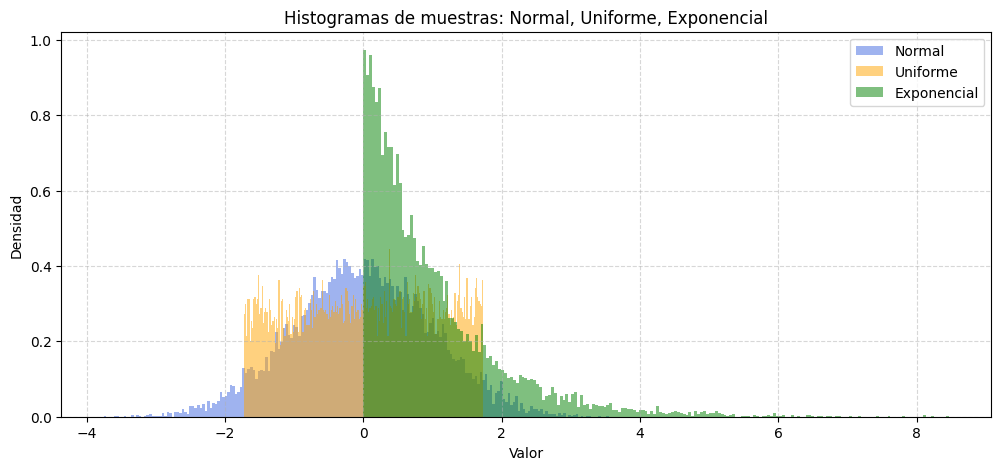

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, entropy

# --- Configuración general ---
N = 10000

# 1. Distribución Normal
mu, sigma = 0, 1
normal_samples = np.random.normal(mu, sigma, N)

# 2. Distribución Uniforme
a, b = -np.sqrt(3), np.sqrt(3)  # Así la varianza es 1 (igual que normal)
uniform_samples = np.random.uniform(a, b, N)

# 3. Distribución Exponencial
scale = 1  # varianza = 1, media = 1
exp_samples = np.random.exponential(scale, N)

# --- Cálculo de varianza ---
var_normal = np.var(normal_samples)
var_uniform = np.var(uniform_samples)
var_exp = np.var(exp_samples)

# --- Cálculo de entropía diferencial ---
# Aproximación numérica usando histogramas (bins finos)
bins = 200

def calc_entropy(samples, bins):
    hist, bin_edges = np.histogram(samples, bins=bins, density=True)
    hist = hist[hist > 0]  # quitar ceros para evitar log(0)
    return entropy(hist, base=np.e)

ent_normal = calc_entropy(normal_samples, bins)
ent_uniform = calc_entropy(uniform_samples, bins)
ent_exp = calc_entropy(exp_samples, bins)

# --- Mostrar resultados ---
print('---- VARIANZA ----')
print(f'Normal:    {var_normal:.3f}')
print(f'Uniforme:  {var_uniform:.3f}')
print(f'Exponencial: {var_exp:.3f}')
print('\n---- ENTROPÍA (aprox. diferencial, nats) ----')
print(f'Normal:    {ent_normal:.3f}')
print(f'Uniforme:  {ent_uniform:.3f}')
print(f'Exponencial: {ent_exp:.3f}')

# --- Visualización ---
plt.figure(figsize=(12, 5))
plt.hist(normal_samples, bins=bins, density=True, alpha=0.5, label='Normal', color='royalblue')
plt.hist(uniform_samples, bins=bins, density=True, alpha=0.5, label='Uniforme', color='orange')
plt.hist(exp_samples, bins=bins, density=True, alpha=0.5, label='Exponencial', color='green')
plt.title('Histogramas de muestras: Normal, Uniforme, Exponencial')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
from IPython.display import display, HTML

# =================== CONTENIDO DESPLEGABLE ====================
entropia_sesgo_varianza_html = r"""
<h4>La Relación Profunda entre Entropía, Sesgo y Varianza en Modelos de Árboles de Decisión</h4>

<p><b>Paso 1: Entendiendo la Entropía en el Contexto del Aprendizaje Automático</b></p>
<p>
En teoría de la información, la entropía es una medida cuantitativa de la incertidumbre o impureza en un conjunto de datos, formulada por Claude Shannon. Para un conjunto de datos de clasificación \( D \) con \( k \) clases, la entropía se define como:
</p>
<div class="formula-block">
$$
H(D) = - \sum_{i=1}^k p(c_i) \log_2(p(c_i))
$$
</div>
<p>
donde \( p(c_i) \) es la proporción de ejemplos en \( D \) que pertenecen a la clase \( c_i \).
</p>
<ul>
<li><b>Entropía Máxima:</b> Cuando las clases están perfectamente balanceadas (por ejemplo, 50% Clase A, 50% Clase B). Hay máxima incertidumbre sobre la clase de un elemento extraído al azar.</li>
<li><b>Entropía Cero:</b> Cuando todos los ejemplos pertenecen a la misma clase. Hay certeza total; el conjunto es "puro".</li>
</ul>
<p>
En los árboles de decisión, el objetivo es encontrar las divisiones que más reduzcan la entropía, es decir, que incrementen la pureza de los subconjuntos resultantes. Esta reducción es la <i>Ganancia de Información</i>. El árbol sigue un enfoque codicioso para minimizar la entropía, buscando en cada nodo la división que ofrezca el mayor descenso de incertidumbre.
</p>

<p><b>Paso 2: La Búsqueda Incesante de Entropía Cero y su Conexión con la Alta Varianza</b></p>
<p>
Imagina un árbol de decisión sin restricciones: el algoritmo dividirá los datos hasta que cada hoja sea perfectamente pura, logrando entropía cero en cada hoja. ¿Qué ocurre entonces?
</p>
<ul>
<li><b>Bajo Sesgo (Low Bias):</b> El árbol puede adaptar reglas extremadamente complejas, creando límites de decisión arbitrarios para ajustarse perfectamente a cada observación del conjunto de entrenamiento. El error de entrenamiento puede ser cero, señal de un sesgo mínimo.</li>
<li><b>Alta Varianza (High Variance):</b> El modelo se vuelve muy sensible a los detalles y el ruido del conjunto de entrenamiento. Cambios mínimos en los datos generan árboles completamente distintos. El modelo es inestable y sobreajusta (overfitting).</li>
</ul>
<p>
La conexión profunda es que <b>minimizar agresivamente la entropía</b> lleva a una explosión de la complejidad y, por ende, a modelos de baja sesgo y alta varianza. La entropía, por tanto, actúa como el <b>motor que impulsa la complejidad del modelo</b>, y el sobreajuste es el precio de seguir ese gradiente sin restricciones.
</p>

<p><b>Paso 3: Introduciendo el Sesgo para Combatir la Varianza (Tolerando la Entropía)</b></p>
<p>
Para evitar el sobreajuste, introducimos restricciones (hiperparámetros) que <b>frenan la reducción de entropía</b> en los nodos hoja:
</p>
<ul>
<li><b>max_depth:</b> Limita la profundidad máxima del árbol. No se permite crecer indefinidamente. Las hojas resultantes tendrán cierta impureza (entropía &gt; 0).</li>
<li><b>min_samples_leaf:</b> Obliga a que cada hoja contenga un número mínimo de ejemplos, impidiendo hojas puras basadas en muy pocos datos.</li>
<li><b>min_samples_split:</b> Prohíbe dividir un nodo con pocos ejemplos, evitando aprender reglas sobre subconjuntos pequeños y ruidosos.</li>
</ul>
<p>
El efecto es claro:
<ul>
<li><b>Alto Sesgo (High Bias):</b> El modelo sólo puede aprender reglas más generales, pierde flexibilidad y puede fallar sistemáticamente en capturar todas las relaciones complejas del dato.</li>
<li><b>Baja Varianza (Low Variance):</b> El modelo se vuelve estable, y generaliza mejor a nuevos datos, pues ya no depende de las particularidades de la muestra de entrenamiento.</li>
</ul>
Así, forzar al árbol a tolerar cierta entropía (impureza) es la estrategia práctica para aumentar el sesgo y reducir la varianza.
</p>

<h4>Síntesis: Entropía como el Motor de la Complejidad y el Equilibrio Sesgo-Varianza</h4>
<p>
La entropía, en este contexto, no es ni sesgo ni varianza, sino el <b>combustible</b> que el algoritmo utiliza para crear complejidad. Permitir la minimización total de entropía lleva al sobreajuste; limitar cuánta entropía puede eliminarse (a través de hiperparámetros) es el mecanismo de control para alcanzar un equilibrio óptimo entre sesgo y varianza.
</p>
<table>
<thead>
<tr><th>Estrategia del Modelo</th><th>Impacto en la Entropía</th><th>Complejidad Resultante</th><th>Sesgo</th><th>Varianza</th><th>Diagnóstico</th></tr>
</thead>
<tbody>
<tr><td>Búsqueda Agresiva de la Pureza</td><td>Minimiza entropía hasta cero en cada hoja</td><td>Alta</td><td>Bajo</td><td>Alta</td><td>Sobreajuste</td></tr>
<tr><td>Tolerancia a la Impureza (Restringido)</td><td>Acepta hojas con entropía &gt; 0</td><td>Baja</td><td>Alto</td><td>Baja</td><td>Subajuste</td></tr>
</tbody>
</table>

<p>
Ajustar hiperparámetros en un árbol de decisión es, en esencia, <b>gestionar indirectamente cuánta entropía permitimos que el modelo elimine</b>. Así, la <b>gestión de la entropía es la herramienta práctica para navegar el compromiso fundamental entre sesgo y varianza</b>.
</p>
"""

# ================ HTML ESTÁTICOS Y PLANTILLA ==================
intro_html = r"""
<div class="content-block">
    <h2>Entropía, Sesgo y Varianza: Una Conexión Fundamental</h2>
    <p>Explora en profundidad la relación entre la entropía, la complejidad de los modelos y el equilibrio entre sesgo y varianza en algoritmos de aprendizaje supervisado, especialmente en árboles de decisión.</p>
</div>
"""

conclusion_html = r"""
<div class="content-block">
    <h2>Conclusión</h2>
    <p>La entropía es el gradiente natural de la complejidad: aprender a regularla a través de hiperparámetros es la clave para diseñar modelos que no sólo aprendan del pasado, sino que puedan generalizar hacia el futuro.</p>
</div>
"""

# Tarjeta desplegable para el contenido experto
cards = [{
    "titulo": "Entropía, Complejidad, Sesgo y Varianza en Árboles de Decisión: Desarrollo Máximo",
    "contenido": entropia_sesgo_varianza_html
}]

def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(cards)

plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\(', '\\)']],
        displayMath: [['$$', '$$'], ['\\[', '\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #311b92 0%, #4527a0 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(245, 243, 255, 0.95);
      --text-primary: #1a237e;
      --text-secondary: #311b92;
      --accent-primary: #512da8;
      --accent-secondary: #7e57c2;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(209, 196, 233, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f0c29 0%, #302b63 100%);
      --bg-secondary: rgba(26, 22, 53, 0.85);
      --bg-tertiary: rgba(38, 33, 78, 0.8);
      --text-primary: #ede7f6;
      --text-secondary: #d1c4e9;
      --accent-primary: #9575cd;
      --accent-secondary: #b39ddb;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.4);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.4; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.8s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.8s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content ul li::marker {{ color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .formula-block {{ padding: 1.5rem; background: rgba(0, 0, 0, 0.1); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; color: var(--text-primary); border: 1px solid var(--border-color); }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    .MathJax {{ color: var(--text-primary) !important; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        const storedTheme = localStorage.getItem('theme');
        setTheme(storedTheme || 'dark');

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax && card.classList.contains('open')) {{
                    window.MathJax.typesetPromise([card]).catch(err => console.log('MathJax typeset error:', err));
                }}
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                p.style.opacity = 0.6;
                container.appendChild(p);
            }}
        }}

        window.addEventListener('load', () => {{
            if (window.MathJax) {{
                window.MathJax.typesetPromise().catch(err => console.log('Initial MathJax error:', err));
            }}
        }});
    }})();
  </script>
</body>
</html>
"""

# ================ RENDER FINAL ==================
final_html = plantilla_profesional.format(
    main_title="Entropía, Sesgo y Varianza en Árboles de Decisión",
    introduction_html=intro_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_html,
    footer_text="Material elaborado por el equipo de estadística y machine learning"
)

display(HTML(final_html))


Estrategia del Modelo,Impacto en la Entropía,Complejidad Resultante,Sesgo,Varianza,Diagnóstico
Búsqueda Agresiva de la Pureza,Minimiza entropía hasta cero en cada hoja,Alta,Bajo,Alta,Sobreajuste
Tolerancia a la Impureza (Restringido),Acepta hojas con entropía > 0,Baja,Alto,Baja,Subajuste


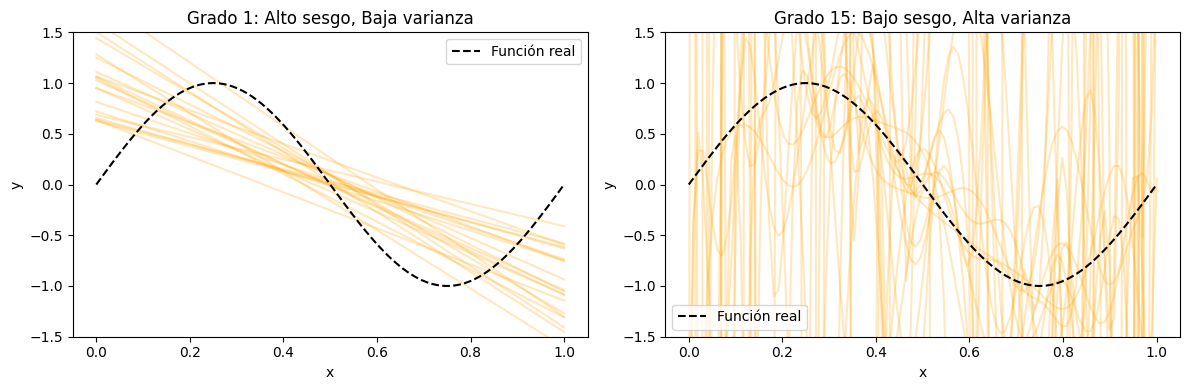

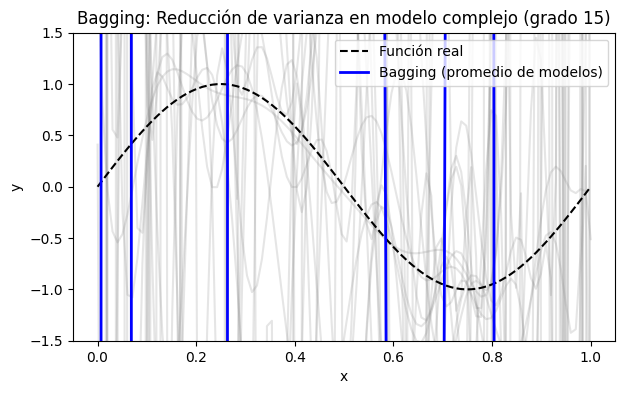


**Explicación:**

- A la izquierda, los modelos lineales (grado 1) subajustan todos, muestran **alto sesgo** pero son estables (baja varianza).
- A la derecha, los modelos polinómicos complejos (grado 15) pueden ajustarse perfectamente a cada muestra (bajo sesgo), pero los resultados varían enormemente con cada conjunto de datos (alta varianza, sobreajuste).
- El gráfico de Bagging muestra cómo el **promedio** de muchos modelos complejos suaviza la predicción final, reduciendo la varianza y evitando sobreajuste extremo, sin perder la capacidad de capturar la forma real de la función. Así funciona el bagging en la práctica.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# 1. Función objetivo real
def true_func(x):
    return np.sin(2 * np.pi * x)

# 2. Generar datos sintéticos
np.random.seed(0)
n = 12  # tamaño muestra pequeña para maximizar el efecto
X_plot = np.linspace(0, 1, 100)
y_true = true_func(X_plot)

# Parámetros del experimento
n_samples = 12      # tamaño de cada muestra
n_models = 20       # número de muestras/replicas (para mostrar varianza)
noise_std = 0.25    # nivel de ruido

# 3. Visualización de ajuste con diferentes grados
def plot_bias_variance(degree, ax, title):
    for _ in range(n_models):
        # Nueva muestra aleatoria cada vez
        X_sample = np.random.rand(n_samples, 1)
        y_sample = true_func(X_sample).ravel() + np.random.normal(0, noise_std, n_samples)
        # Modelo polinómico
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_sample)
        model = LinearRegression().fit(X_poly, y_sample)
        # Predicción para la curva suave
        X_poly_plot = poly.transform(X_plot.reshape(-1,1))
        y_pred = model.predict(X_poly_plot)
        ax.plot(X_plot, y_pred, color='orange', alpha=0.25)
    ax.plot(X_plot, y_true, 'k--', label="Función real")
    ax.set_title(title)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_bias_variance(1, axes[0], "Grado 1: Alto sesgo, Baja varianza")
plot_bias_variance(15, axes[1], "Grado 15: Bajo sesgo, Alta varianza")
plt.tight_layout()
plt.show()

# 4. Bagging: Promedio de modelos complejos
degree = 15
all_preds = []

plt.figure(figsize=(7, 4))
for _ in range(n_models):
    X_sample = np.random.rand(n_samples, 1)
    y_sample = true_func(X_sample).ravel() + np.random.normal(0, noise_std, n_samples)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_sample)
    model = LinearRegression().fit(X_poly, y_sample)
    X_poly_plot = poly.transform(X_plot.reshape(-1,1))
    y_pred = model.predict(X_poly_plot)
    all_preds.append(y_pred)
    plt.plot(X_plot, y_pred, color='gray', alpha=0.2)

mean_pred = np.mean(all_preds, axis=0)
plt.plot(X_plot, y_true, 'k--', label="Función real")
plt.plot(X_plot, mean_pred, 'b', linewidth=2, label="Bagging (promedio de modelos)")
plt.title("Bagging: Reducción de varianza en modelo complejo (grado 15)")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

# 5. Explicación visual interactiva
from IPython.display import Markdown, display
display(Markdown("""
**Explicación:**

- A la izquierda, los modelos lineales (grado 1) subajustan todos, muestran **alto sesgo** pero son estables (baja varianza).
- A la derecha, los modelos polinómicos complejos (grado 15) pueden ajustarse perfectamente a cada muestra (bajo sesgo), pero los resultados varían enormemente con cada conjunto de datos (alta varianza, sobreajuste).
- El gráfico de Bagging muestra cómo el **promedio** de muchos modelos complejos suaviza la predicción final, reduciendo la varianza y evitando sobreajuste extremo, sin perder la capacidad de capturar la forma real de la función. Así funciona el bagging en la práctica.


"""))


In [ ]:
# --- 0. CONFIGURACIÓN INICIAL Y LIBRERÍAS ---

# Descomenta y ejecuta esta línea si estás en Google Colab y no tienes ipywidgets instalado
# !pip install ipywidgets --quiet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, validation_curve
from IPython.display import display, Markdown, clear_output

# --- ESTILO VISUAL PROFESIONAL PARA TODOS LOS GRÁFICOS ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = 'w'

# --- TÍTULO PRINCIPAL DEL NOTEBOOK INTERACTIVO ---
display(Markdown("# Explorando el Compromiso Sesgo-Varianza de Forma Interactiva"))
display(Markdown("---"))

# --- DATOS BASE Y FUNCIÓN VERDADERA (CENTRALIZADOS) ---
def true_func(x):
    """La función real que intentamos aproximar."""
    return np.sin(2.5 * np.pi * x)

def generate_data(n_samples=25, noise=0.25):
    """Genera una muestra de datos con ruido."""
    np.random.seed(None) # Permite variabilidad en cada ejecución
    X = np.sort(np.random.rand(n_samples, 1))
    y = true_func(X).ravel() + np.random.normal(0, noise, n_samples)
    return X, y

# Datos para graficar la curva verdadera
X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
y_true = true_func(X_plot)

# --- FUNCIÓN DE VISUALIZACIÓN PARA REGRESIÓN POLINÓMICA ---
def plot_poly_bias_variance(degree, noise, resample_data):
    fig, ax = plt.subplots()
    ax.plot(X_plot, y_true, 'k--', lw=2.5, label="Función Real (Verdad)")

    for _ in range(15): # Entrenamos 15 modelos con datos distintos
        X_sample, y_sample = generate_data(noise=noise)
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_plot)
        ax.plot(X_plot, y_pred, color='darkorange', alpha=0.3)

    # Título dinámico claro
    if degree <= 2: title = "Modelo Simple: Alto Sesgo, Baja Varianza (Subajuste)"
    elif degree <= 6: title = "Modelo Balanceado: Buen Equilibrio"
    else: title = "Modelo Complejo: Bajo Sesgo, Alta Varianza (Sobreajuste)"

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Característica (x)"), ax.set_ylabel("Valor (y)")
    ax.set_ylim(-2.2, 2.2)
    ax.legend(['Función Real', 'Predicciones del Modelo'], loc='upper right')
    plt.show()

# ------------- 1. REGRESIÓN POLINÓMICA: VISUALIZANDO LA VARIANZA ---------------
display(Markdown("### 1. Regresión Polinómica: Observando el Sesgo y la Varianza en Acción"))
display(Markdown("""
Usa los deslizadores para explorar el concepto más fundamental:
*   **Grado Polinómico:** Controla la **complejidad** del modelo.
*   **Ruido:** Controla el **error irreducible** en los datos.
*   **Varianza Visible:** Las múltiples líneas naranjas muestran cómo cambia la predicción del modelo con diferentes muestras de datos. Su "aleteo" es la varianza. Un aleteo amplio significa alta varianza.
"""))

# WIDGET INTERACTIVO CORREGIDO
interact_poly = widgets.interactive(
    plot_poly_bias_variance,
    degree=widgets.IntSlider(min=1, max=15, step=1, value=1, description="Grado Polinómico:", style={'description_width': 'initial'}),
    noise=widgets.FloatSlider(min=0, max=0.7, step=0.05, value=0.25, description="Nivel de Ruido:", style={'description_width': 'initial'}),
    resample_data=widgets.ToggleButton(value=False, description="Generar Nuevos Datos", icon='random')
)
display(interact_poly)

# --------- 2. CURVAS DE VALIDACIÓN Y APRENDIZAJE -----------
display(Markdown("### 2. Curvas de Diagnóstico: Entendiendo el Comportamiento del Modelo"))
display(Markdown("""
Las curvas de validación y aprendizaje son las "radiografías" de nuestro modelo. Nos dicen si el problema es el sesgo, la varianza o la falta de datos.
*   **Curva de Validación:** Muestra cómo varía el error al cambiar la **complejidad** de un modelo. Ideal para **elegir el mejor hiperparámetro**.
*   **Curva de Aprendizaje:** Muestra cómo varía el error al cambiar la **cantidad de datos** de entrenamiento. Ideal para saber si **necesitamos más datos**.
"""))

@widgets.interact(
    model_name=widgets.Dropdown(options=['Árbol de Decisión', 'K-Vecinos Cercanos (KNN)'], value='Árbol de Decisión', description="Modelo:"),
    param_value=widgets.IntSlider(min=1, max=20, step=1, value=5, description="Complejidad:")
)
def plot_diagnostic_curves(model_name, param_value):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Generamos un conjunto de datos más grande para estas curvas
    X_full, y_full = generate_data(n_samples=150, noise=0.15)

    if model_name == 'Árbol de Decisión':
        model, param_name, param_range = DecisionTreeRegressor(random_state=42), "max_depth", np.arange(1, 21)
        ax1.set_xlabel("Complejidad (Profundidad Máxima del Árbol)")
    else: # KNN
        model, param_name, param_range = KNeighborsRegressor(), "n_neighbors", np.arange(1, 41)
        ax1.set_xlabel("Complejidad (Inverso de K) -> más a la izq. es más complejo")

    # --- Gráfico 1: Curva de Validación ---
    train_scores, test_scores = validation_curve(model, X_full, y_full, param_name=param_name,
                                                 param_range=param_range, cv=5, scoring="neg_mean_squared_error")
    train_mse = -train_scores.mean(axis=1)
    test_mse = -test_scores.mean(axis=1)

    ax1.plot(param_range, train_mse, 'o-', color='cornflowerblue', label="Error de Entrenamiento")
    ax1.plot(param_range, test_mse, 'o-', color='darkblue', label="Error de Validación")

    optimal_idx = np.argmin(test_mse)
    optimal_param = param_range[optimal_idx]
    min_mse = test_mse[optimal_idx]

    ax1.axvline(optimal_param, linestyle=':', color='green', lw=2.5, label=f'Óptimo: {optimal_param} (MSE={min_mse:.3f})')
    ax1.set_title(f'Curva de Validación para {model_name}', fontsize=14)
    ax1.set_ylabel("Error Cuadrático Medio (MSE)")
    ax1.legend()

    # --- Gráfico 2: Curva de Aprendizaje para el parámetro elegido ---
    model.set_params(**{param_name: param_value})
    train_sizes, train_scores_lc, test_scores_lc = learning_curve(
        model, X_full, y_full, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
    )

    train_mse_lc = -train_scores_lc.mean(axis=1)
    test_mse_lc = -test_scores_lc.mean(axis=1)

    ax2.plot(train_sizes, train_mse_lc, 'o-', color='cornflowerblue', label="Error de Entrenamiento")
    ax2.plot(train_sizes, test_mse_lc, 'o-', color='darkblue', label="Error de Validación")

    ax2.set_title(f"Curva de Aprendizaje (Complejidad={param_value})", fontsize=14)
    ax2.set_xlabel("Cantidad de Datos de Entrenamiento")
    ax2.set_ylabel("Error Cuadrático Medio (MSE)")
    ax2.legend()
    ax2.set_ylim(0, 0.3)

    plt.tight_layout()
    plt.show()

# --------- 3. REGULARIZACIÓN: DOMANDO LA COMPLEJIDAD -----------
display(Markdown("### 3. Regularización Ridge: Domando un Modelo Sobreajustado"))
display(Markdown("""
La regularización es una técnica para **forzar a un modelo a ser más simple**, reduciendo su varianza a costa de introducir un poco de sesgo.
*   `Alpha` (α) es la **fuerza de la regularización**.
*   Observa cómo un `alpha` alto **"doma" la curva roja sobreajustada**, tirando de ella hacia una forma más simple y estable, aunque se aleje un poco de los puntos de datos.
"""))

X_sample_reg, y_sample_reg = generate_data(n_samples=30, noise=0.2)
overfit_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
overfit_model.fit(X_sample_reg, y_sample_reg)
y_overfit_pred = overfit_model.predict(X_plot)

@widgets.interact(alpha=widgets.FloatLogSlider(value=1e-5, base=10, min=-8, max=2, step=0.5, description="Alpha (Fuerza):", style={'description_width': 'initial'}))
def plot_ridge_regularization(alpha):
    regularized_model = make_pipeline(PolynomialFeatures(15), Ridge(alpha=alpha))
    regularized_model.fit(X_sample_reg, y_sample_reg)
    y_reg_pred = regularized_model.predict(X_plot)

    plt.figure()
    plt.scatter(X_sample_reg, y_sample_reg, alpha=0.7, label="Datos de entrenamiento")
    plt.plot(X_plot, y_true, 'k--', lw=2.5, label="Función Real")
    plt.plot(X_plot, y_overfit_pred, 'r-', lw=1.5, alpha=0.5, label="Modelo Sobreajustado (sin regularizar)")
    plt.plot(X_plot, y_reg_pred, 'b-', lw=2.5, label=f"Modelo Domado (Ridge alpha={alpha:.2e})")

    plt.title("Efecto de la Regularización Ridge", fontsize=14)
    plt.xlabel("Característica (x)"), plt.ylabel("Valor (y)")
    plt.legend()
    plt.ylim(-2, 2)
    plt.show()

# Explorando el Compromiso Sesgo-Varianza de Forma Interactiva

---

### 1. Regresión Polinómica: Observando el Sesgo y la Varianza en Acción


Usa los deslizadores para explorar el concepto más fundamental:
*   **Grado Polinómico:** Controla la **complejidad** del modelo.
*   **Ruido:** Controla el **error irreducible** en los datos.
*   **Varianza Visible:** Las múltiples líneas naranjas muestran cómo cambia la predicción del modelo con diferentes muestras de datos. Su "aleteo" es la varianza. Un aleteo amplio significa alta varianza.


interactive(children=(IntSlider(value=1, description='Grado Polinómico:', max=15, min=1, style=SliderStyle(des…

### 2. Curvas de Diagnóstico: Entendiendo el Comportamiento del Modelo


Las curvas de validación y aprendizaje son las "radiografías" de nuestro modelo. Nos dicen si el problema es el sesgo, la varianza o la falta de datos.
*   **Curva de Validación:** Muestra cómo varía el error al cambiar la **complejidad** de un modelo. Ideal para **elegir el mejor hiperparámetro**.
*   **Curva de Aprendizaje:** Muestra cómo varía el error al cambiar la **cantidad de datos** de entrenamiento. Ideal para saber si **necesitamos más datos**.


interactive(children=(Dropdown(description='Modelo:', options=('Árbol de Decisión', 'K-Vecinos Cercanos (KNN)'…

### 3. Regularización Ridge: Domando un Modelo Sobreajustado


La regularización es una técnica para **forzar a un modelo a ser más simple**, reduciendo su varianza a costa de introducir un poco de sesgo.
*   `Alpha` (α) es la **fuerza de la regularización**.
*   Observa cómo un `alpha` alto **"doma" la curva roja sobreajustada**, tirando de ella hacia una forma más simple y estable, aunque se aleje un poco de los puntos de datos.


interactive(children=(FloatLogSlider(value=1e-05, description='Alpha (Fuerza):', max=2.0, min=-8.0, step=0.5, …

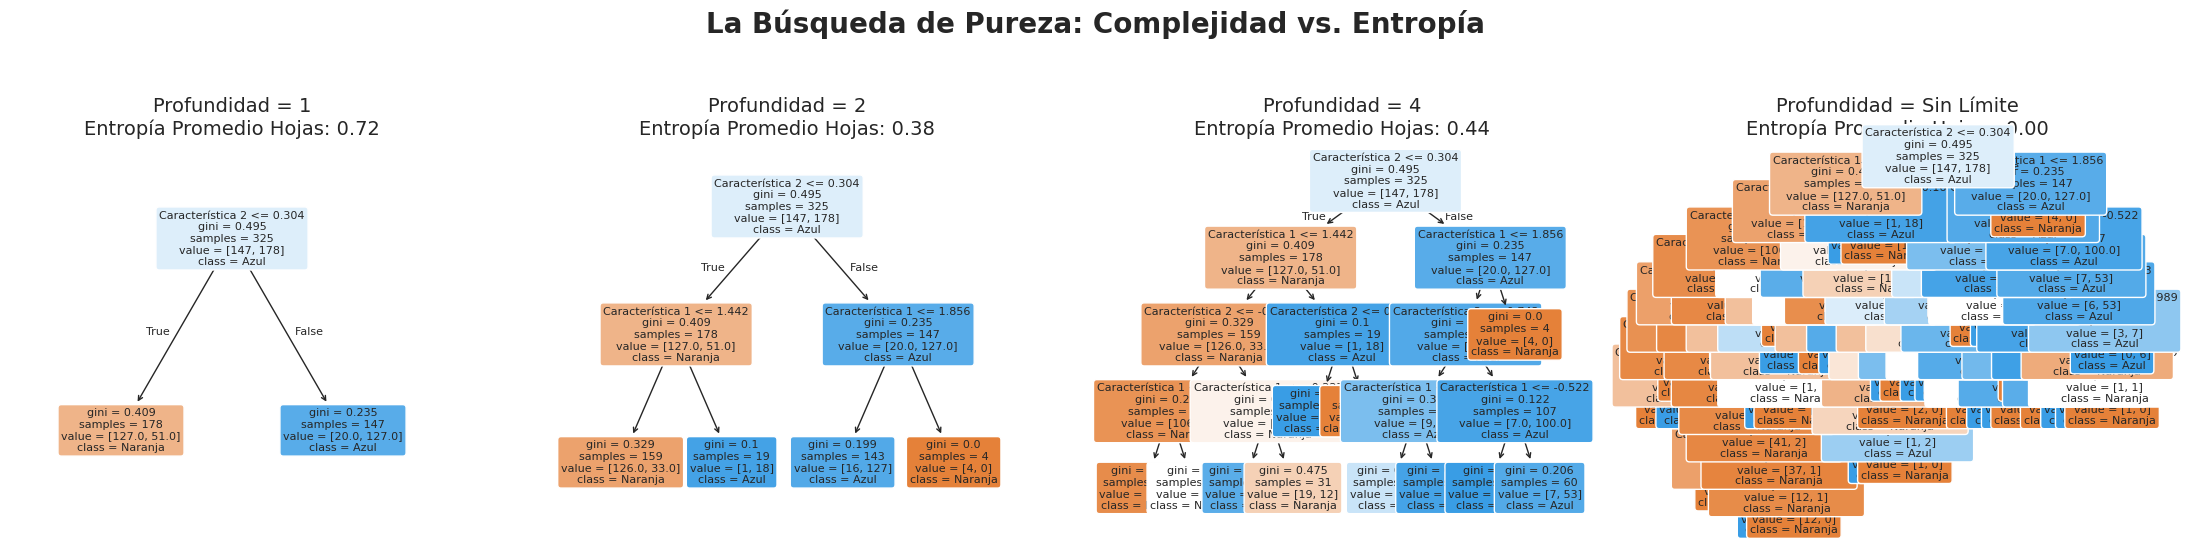

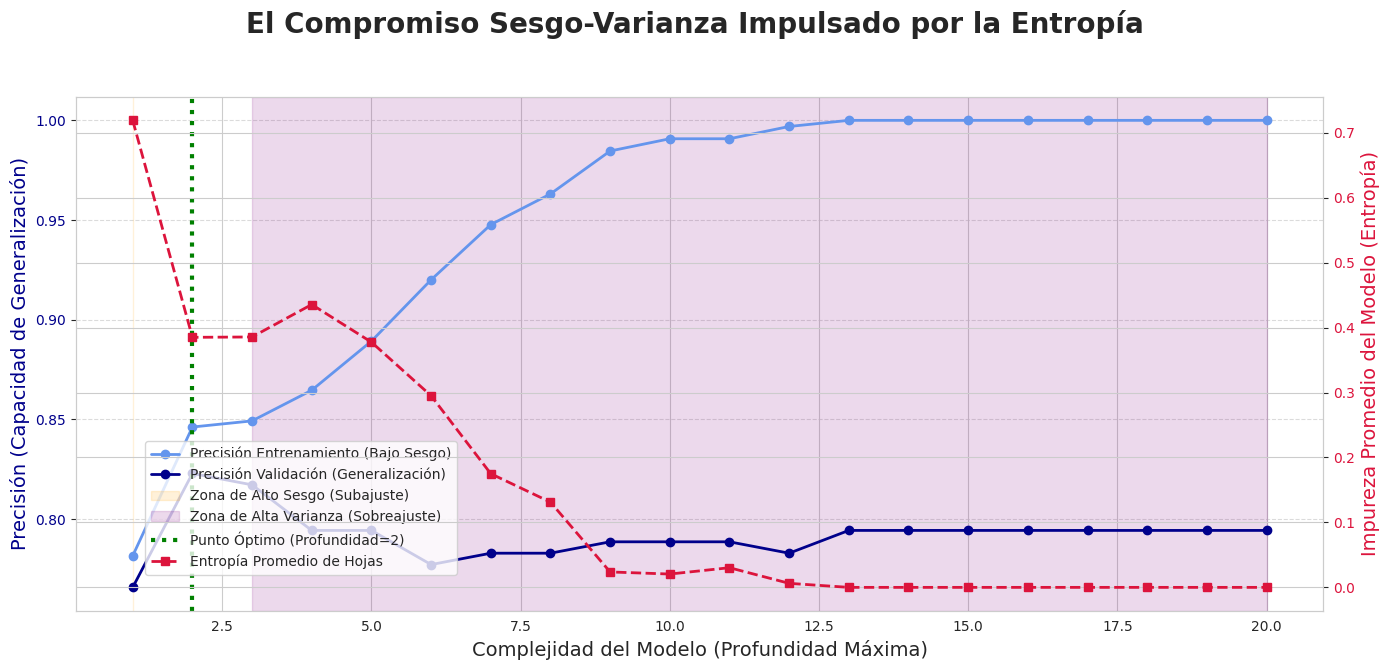

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# --- 1. CONFIGURACIÓN INICIAL Y GENERACIÓN DE DATOS ---

# Estilo visual para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['axes.facecolor'] = 'w'

# Creación de un universo de datos controlable
# Introducimos un 15% de ruido (flip_y) para simular el error irreducible y permitir el sobreajuste
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    flip_y=0.15,
    class_sep=0.8,
    random_state=42
)
# Separación en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Función auxiliar para calcular la entropía de Shannon
def entropy(y_labels):
    """Calcula la entropía para un conjunto de etiquetas."""
    if len(y_labels) == 0:
        return 0
    values, counts = np.unique(y_labels, return_counts=True)
    probabilities = counts / counts.sum()
    # Se añade 1e-9 para evitar log(0)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))


# --- 2. VISUALIZACIÓN 1: EL CRECIMIENTO DEL ÁRBOL Y LA BÚSQUEDA DE PUREZA ---

# Definimos las profundidades a visualizar, incluyendo "Sin Límite" (None)
max_depths_to_plot = [1, 2, 4, None]
fig, axes = plt.subplots(1, len(max_depths_to_plot), figsize=(22, 5.5))
fig.suptitle('La Búsqueda de Pureza: Complejidad vs. Entropía', fontsize=20, fontweight='bold')

for idx, md in enumerate(max_depths_to_plot):
    # Entrenar el clasificador para cada profundidad
    clf = DecisionTreeClassifier(max_depth=md, random_state=42)
    clf.fit(X_train, y_train)
    ax = axes[idx]

    # Calcular la entropía promedio de las hojas del árbol entrenado
    leaf_ids = clf.apply(X_train)
    avg_entropy = np.mean([entropy(y_train[leaf_ids == leaf]) for leaf in np.unique(leaf_ids)])

    # Graficar la estructura del árbol
    plot_tree(
        clf,
        feature_names=['Característica 1','Característica 2'],
        class_names=['Naranja','Azul'],
        filled=True,
        impurity=True,  # Mostrar la entropía en cada nodo
        ax=ax,
        fontsize=8,
        rounded=True
    )

    # Configurar títulos informativos
    depth_title = f"Profundidad = {md if md is not None else 'Sin Límite'}"
    entropy_title = f"Entropía Promedio Hojas: {avg_entropy:.2f}"
    ax.set_title(f"{depth_title}\n{entropy_title}", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


# --- 3. VISUALIZACIÓN 2: CUANTIFICANDO EL COMPROMISO SESGO-VARIANZA ---

# Rango de profundidades para analizar el comportamiento
depth_range = np.arange(1, 21)
avg_leaf_entropies = []
train_accuracy = []
test_accuracy = []

# Iterar sobre el rango de profundidades para recolectar métricas
for d in depth_range:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    # Calcular y guardar la entropía promedio de hojas
    leaf_ids = clf.apply(X_train)
    avg_leaf_entropies.append(np.mean([entropy(y_train[leaf_ids == leaf]) for leaf in np.unique(leaf_ids)]))

    # Calcular y guardar la precisión en entrenamiento y prueba
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

# Crear la figura y el primer eje para las curvas de precisión
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.suptitle('El Compromiso Sesgo-Varianza Impulsado por la Entropía', fontsize=20, fontweight='bold')

# Eje 1: Curvas de Precisión
ax1.set_xlabel('Complejidad del Modelo (Profundidad Máxima)', fontsize=14)
ax1.set_ylabel('Precisión (Capacidad de Generalización)', fontsize=14, color='darkblue')
ax1.plot(depth_range, train_accuracy, 'o-', color='cornflowerblue', lw=2, label='Precisión Entrenamiento (Bajo Sesgo)')
ax1.plot(depth_range, test_accuracy, 'o-', color='darkblue', lw=2, label='Precisión Validación (Generalización)')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Eje 2: Curva de Entropía, compartiendo el eje X
ax2 = ax1.twinx()
ax2.set_ylabel('Impureza Promedio del Modelo (Entropía)', fontsize=14, color='crimson')
ax2.plot(depth_range, avg_leaf_entropies, 's--', color='crimson', lw=2, label='Entropía Promedio de Hojas')
ax2.tick_params(axis='y', labelcolor='crimson')

# Identificar el punto óptimo y sombrear las zonas
optimal_depth = np.argmax(test_accuracy) + 1 # +1 porque los índices empiezan en 0
ax1.axvspan(1, optimal_depth - 1, color='orange', alpha=0.15, label='Zona de Alto Sesgo (Subajuste)')
ax1.axvspan(optimal_depth + 1, max(depth_range), color='purple', alpha=0.15, label='Zona de Alta Varianza (Sobreajuste)')
ax1.axvline(x=optimal_depth, color='green', linestyle=':', linewidth=3, label=f'Punto Óptimo (Profundidad={optimal_depth})')

# Unificar las leyendas de ambos ejes en un solo cuadro
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(0.05, 0.2))

fig.tight_layout(rect=[0, 0.03, 1, 0.94])
plt.show()